In [42]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

In [3]:
df = pd.read_csv("data/沪深300天级别数据.csv",header=0,index_col=None,sep='\s+',parse_dates=[0])

In [65]:
df[1619:]

,time,open,close,high,low,volume,money
1619,2018-08-29,3393.05,3386.57,3398.71,3377.12,6702040400,79072300213
1620,2018-08-30,3385.81,3351.09,3402.56,3349.47,6838529000,80226052652
1621,2018-08-31,3333.38,3334.50,3356.58,3310.87,7620563000,96091892858
1622,2018-09-03,3320.69,3321.82,3325.61,3291.78,6642985500,81305681453
1623,2018-09-04,3324.19,3363.90,3370.96,3307.96,6708880700,85892034874
1624,2018-09-05,3349.70,3298.14,3354.20,3298.14,6430188800,80656675217
1625,2018-09-06,3286.66,3262.88,3311.50,3253.76,6230028800,79373138215
1626,2018-09-07,3273.89,3277.64,3316.61,3253.72,6394740800,81263439990
1627,2018-09-10,3271.38,3230.07,3277.88,3227.85,6381705100,76175580336
1628,2018-09-11,3229.71,3224.21,3245.62,3209.11,5849130500,67722118923


In [5]:
df.shape

(2024, 7)

In [6]:
df_feature = df[['close','open','high', 'low', 'volume', 'money']].astype('float')

In [7]:
sample_num = df.shape[0]

In [8]:
train_num = int(df.shape[0] * 0.8)

In [9]:
test_num = df.shape[0] - train_num

In [10]:
sample_num,train_num,test_num

(2024, 1619, 405)

In [11]:
data_train = df_feature.iloc[:train_num, :]
data_test = df_feature.iloc[train_num:, :]
print(data_train.shape, data_test.shape)

(1619, 6) (405, 6)


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [14]:
data_train_y = np.array(df_feature.iloc[:train_num, 0])
data_test_y = np.array(df_feature.iloc[train_num:, 0])
print(data_train_y.shape, data_test_y.shape)

(1619,) (405,)


In [16]:
PAST_TIME_STEPS = 10
NEXT_TIME_STEPS = 3

In [17]:
#X_train = np.array([data_train[i : i + PAST_TIME_STEPS, :] for i in range(0,data_train.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),4)])
#X_test = np.array([data_test[i : i + PAST_TIME_STEPS, :] for i in range(0,data_test.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),4)])
X_train = np.array([data_train[i : i + PAST_TIME_STEPS, :] for i in range(0,data_train.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),1)])
X_test = np.array([data_test[i : i + PAST_TIME_STEPS, :] for i in range(0,data_test.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),1)])

In [18]:
#y_train_regression = np.array([data_train_y[i + PAST_TIME_STEPS + NEXT_TIME_STEPS-1] for i in range(0,data_train.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),4)])
#y_test_regression = np.array([data_test_y[i + PAST_TIME_STEPS + NEXT_TIME_STEPS-1] for i in range(0,data_test.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),4)])

y_train_regression = np.array([data_train_y[i + PAST_TIME_STEPS + NEXT_TIME_STEPS] for i in range(0,data_train.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),1)])
y_test_regression = np.array([data_test_y[i + PAST_TIME_STEPS + NEXT_TIME_STEPS] for i in range(0,data_test.shape[0] - (NEXT_TIME_STEPS+ PAST_TIME_STEPS),1)])

In [19]:
print(X_train.shape, y_train_regression.shape, X_test.shape,y_test_regression.shape)

(1606, 10, 6) (1606,) (392, 10, 6) (392,)


In [20]:
INPUT_DIM = data_train.shape[1]
output_dim = 1
batch_size = 8 #每轮训练模型时，样本的数量
epochs = 2000 #训练60轮次
hidden_size = 128
lstm_units = 64

In [47]:
def LSTM_fun(n_input,train_x,train_y,predict_x,prediction_y,seq_len=5):
    #LSTM
    lr=0.001
    lstm_size = 100  #lstm cell数量，基于数据量调整
    epoch_num = 10  #打印次数，和n_batch相乘便是迭代次数
    n_batch = 10
    lookback = seq_len
    tf.reset_default_graph()
    train_y = np.reshape(train_y, [train_y.shape[0], 1])
    prediction_y = np.reshape(prediction_y, [prediction_y.shape[0], 1])

    x = tf.placeholder(tf.float32,[None,lookback,n_input])
    y = tf.placeholder(tf.float32,[None,1])

    weights = tf.Variable(tf.truncated_normal([lstm_size,1],stddev=0.1))
    biases = tf.Variable(tf.constant(0.1,shape=[1]))

    def LSTM_net(x,weights,biases):
        lstm_cell = tf.contrib.rnn.LSTMCell(lstm_size,name='basic_lstm_cell') #.BasicLSTMCell(lstm_size)
        output,final_state = tf.nn.dynamic_rnn(lstm_cell,x,dtype=tf.float32)
        results = tf.matmul(final_state[1],weights)+biases
        return results

    prediction = LSTM_net(x,weights,biases)

    loss = tf.reduce_mean(tf.square(y - prediction))

    #train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)
    train_step = tf.train.AdamOptimizer(lr).minimize(loss)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(epoch_num):
            for j in range(n_batch):
                sess.run(train_step,feed_dict={x:train_x,y:train_y})
                train_loss = sess.run(loss,feed_dict={x:train_x,y:train_y})
            print('train loss is'+ str(train_loss))
        prediction_res = sess.run(prediction,feed_dict={x:predict_x})
    return prediction_res


In [45]:
def LSTM_fun_keras(n_input,train_x,train_y,predict_x,prediction_y,seq_len=5):
    K.get_session().close()
    K.set_session(tf.Session())
    K.get_session().run(tf.global_variables_initializer())
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_len,n_input)))
    model.add(LSTM(units=50))
    model.add(Dense(1,activation='linear'))
    print(model.summary())
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    #model_class.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    # fit model
    history = model.fit(train_x, train_y,validation_split=0.1, epochs=epochs, batch_size=1, shuffle=False, verbose=2, callbacks=[es])
    #history_class = model_class.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, shuffle=False)
    y_pred = model.predict(predict_x)
    return y_pred

In [79]:
def LSTM_fun_keras_att(n_input,train_x,train_y,predict_x,prediction_y,seq_len=5):
    K.get_session().close()
    K.set_session(tf.Session())
    K.get_session().run(tf.global_variables_initializer())
    inputs = Input(shape=(seq_len, n_input))
    #drop1 = Dropout(0.3)(inputs)
    x = Conv1D(filters = 32, kernel_size = 1, activation = 'relu')(inputs)  #, padding = 'same'
    #x = Conv1D(filters=128, kernel_size=5, activation='relu')(output1)#embedded_sequences
    x = MaxPooling1D(pool_size = PAST_TIME_STEPS)(x)
    x = Dropout(0.1)(x)
    print(x.shape)
    lstm_out = Bidirectional(LSTM(32, activation='relu'), name='bilstm')(x)
    #lstm_out = LSTM(lstm_units,activation='relu')(x)
    print(lstm_out.shape)
    # ATTENTION PART STARTS HERE
    attention_probs = Dense(64, activation='sigmoid', name='attention_vec')(lstm_out)
    #attention_mul=layers.merge([stm_out,attention_probs], output_shape],mode='concat',concat_axis=1))
    attention_mul =Multiply()([lstm_out, attention_probs])
    #attention_mul = merge([lstm_out, attention_probs],output_shape=32, name='attention_mul', mode='mul')
    output = Dense(1, activation='linear')(attention_mul)
    #output = Dense(10, activation='sigmoid')(drop2)

    model = Model(inputs=inputs, outputs=output)
    print(model.summary())
    model.compile(loss='mse', optimizer='adam')
    #model_class.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    # fit model
    history = model.fit(train_x, train_y,validation_split=0.1, epochs=epochs, batch_size=1, shuffle=False, verbose=2, callbacks=[es])
    #history = model.fit(train_x, train_y, epochs=100, batch_size=1, shuffle=False)
    y_pred = model.predict(predict_x)
    return y_pred

In [80]:
y_pred_regression = LSTM_fun_keras_att(INPUT_DIM, X_train, y_train_regression, X_test, y_test_regression,seq_len=PAST_TIME_STEPS)

(?, 1, 32)
(?, 64)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 10, 6)        0                                            
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 10, 32)       224         input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_13 (MaxPooling1D) (None, 1, 32)        0           conv1d_13[0][0]                  
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 1, 32)        0           max_pooling1d_13[0][0]           
__________________________________________________________________________________________

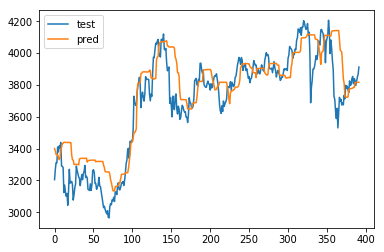

In [81]:
# plot training history
plt.plot(y_test_regression, label='test')
plt.plot(y_pred_regression, label='pred')
plt.legend()
plt.show()